
### Importing the libraries and dataset required

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("StockX.csv")

### Dataset sample

In [3]:
print(df.head())

  Order Date   Brand                                   Sneaker Name  \
0     9/1/17   Yeezy           Adidas-Yeezy-Boost-350-Low-V2-Beluga   
1     9/1/17   Yeezy    Adidas-Yeezy-Boost-350-V2-Core-Black-Copper   
2     9/1/17   Yeezy     Adidas-Yeezy-Boost-350-V2-Core-Black-Green   
3     9/1/17   Yeezy       Adidas-Yeezy-Boost-350-V2-Core-Black-Red   
4     9/1/17   Yeezy  Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017   

  Sale Price Retail Price Release Date  Shoe Size  Buyer Region  
0     $1,097         $220      9/24/16       11.0    California  
1       $685         $220     11/23/16       11.0    California  
2       $690         $220     11/23/16       11.0    California  
3     $1,075         $220     11/23/16       11.5      Kentucky  
4       $828         $220      2/11/17       11.0  Rhode Island  


### Converting the datatypes and Tidying the Data

In [4]:
#Converting datatypes of columms
cols=['Sale Price','Retail Price']
df[cols]=df[cols].apply(lambda x: x.str.replace('$','').str.replace(',','').astype(int))
print(df.dtypes)
df['Sneaker Name']=df['Sneaker Name'].str.replace('-',' ')

Order Date       object
Brand            object
Sneaker Name     object
Sale Price        int32
Retail Price      int32
Release Date     object
Shoe Size       float64
Buyer Region     object
dtype: object


### Calculating the profit margin for all entries

In [5]:
df['Profit Margin']=((df['Sale Price']-df['Retail Price'])/df['Retail Price'])*100

# 1) Buyer Region

### Region Wise Number of orders

In [6]:
df_region=df.groupby('Buyer Region')
region_count=df_region['Sneaker Name'].count().sort_values(ascending=False)
region_count=np.around(region_count,decimals=2)
print(region_count)

Buyer Region
California              19349
New York                16525
Oregon                   7681
Florida                  6376
Texas                    5876
New Jersey               4720
Illinois                 3782
Pennsylvania             3109
Massachusetts            2903
Michigan                 2762
Virginia                 2058
Ohio                     1890
Maryland                 1870
Washington               1863
Georgia                  1846
Arizona                  1398
North Carolina           1344
Delaware                 1242
Connecticut              1110
Indiana                  1026
Colorado                  954
Wisconsin                 840
Nevada                    790
Tennessee                 731
Minnesota                 725
Missouri                  660
South Carolina            570
Louisiana                 537
Kentucky                  488
Iowa                      460
Alabama                   457
Utah                      450
Oklahoma                  4

### Region wise Profit Margin

In [7]:
region_profit=df_region['Profit Margin'].agg(np.mean).sort_values(ascending=False)
region_profit=np.around(region_profit,decimals=2)
print(region_profit)

Buyer Region
Delaware                156.39
Hawaii                  150.40
Nevada                  147.30
California              143.82
Oregon                  139.96
Vermont                 133.79
Iowa                    133.11
Utah                    127.99
Virginia                127.24
Arizona                 126.63
New Jersey              125.95
Florida                 125.57
District of Columbia    124.66
Kentucky                124.44
Washington              122.87
New York                122.14
Alaska                  121.73
Minnesota               120.43
Oklahoma                117.86
Wisconsin               117.57
Colorado                117.27
Maryland                116.81
Georgia                 115.11
Illinois                115.05
Ohio                    115.03
South Carolina          113.89
Massachusetts           113.59
New Mexico              113.00
New Hampshire           112.28
North Dakota            110.24
Rhode Island            109.95
North Carolina          10

### Plotting the Number of orders and Profit Margin w.r.t Region Wise Graphs

Text(0.5, 1.0, 'Profit Margin Region-Wise')

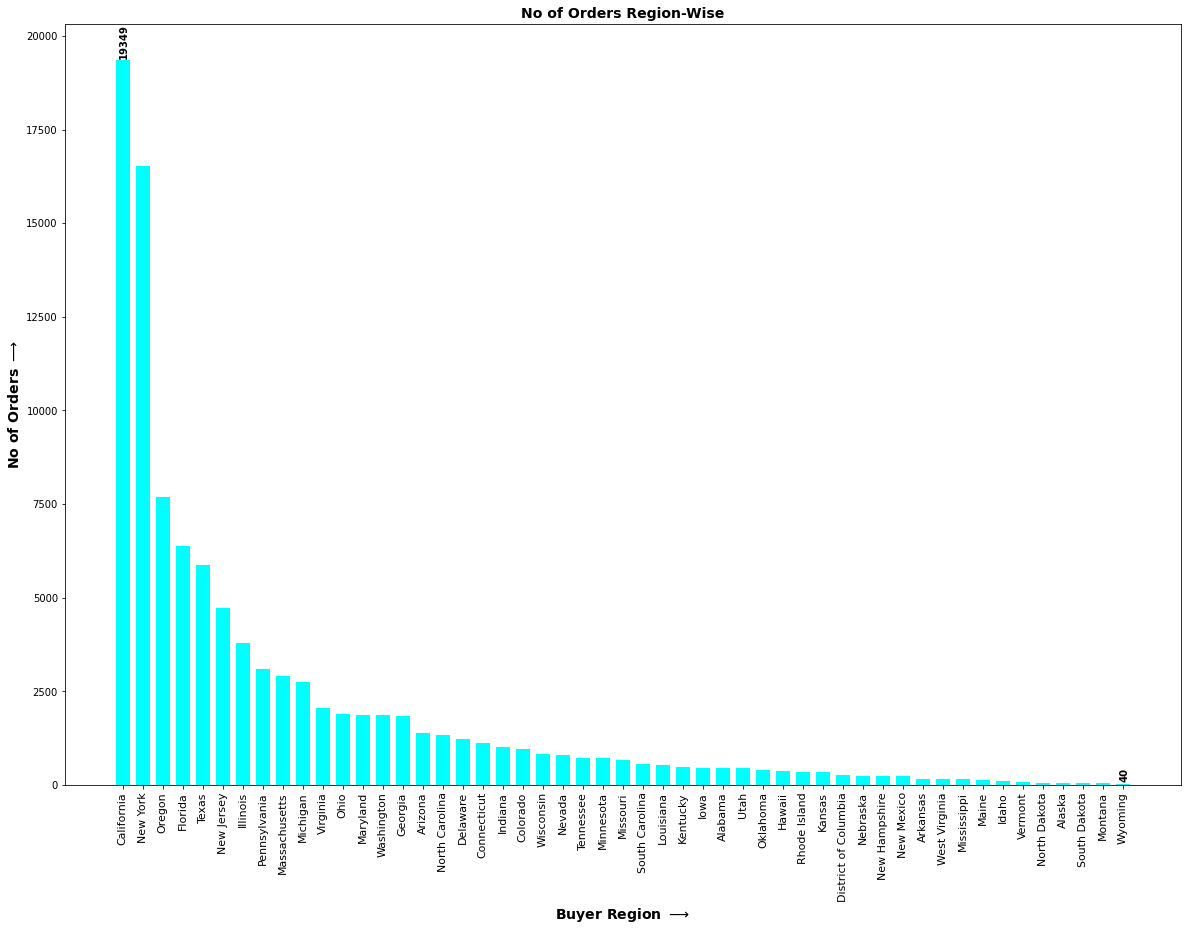

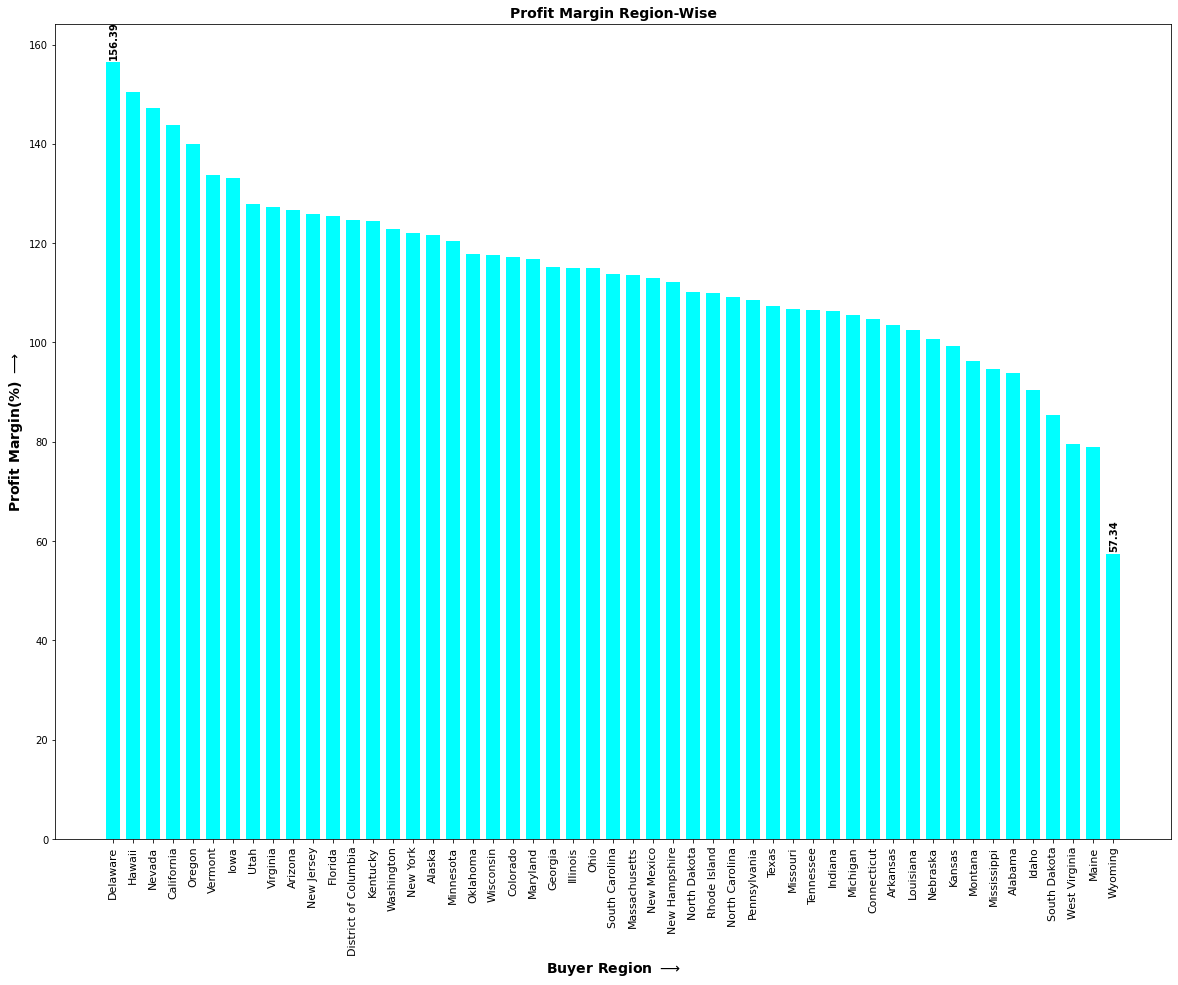

In [8]:
plt.figure(figsize=(20,14))
plt.bar(region_count.index,region_count,width=0.7,align='center',color='cyan')
plt.xticks(rotation=90,size=11)
for i in range(0,51,50):
    plt.annotate(region_count[i],(-0.2+i,region_count[i]+100),rotation=90,fontweight='bold')
plt.xlabel(r'Buyer Region $\longrightarrow$',fontweight='bold',fontsize=14)
plt.ylabel(r'No of Orders $\longrightarrow$',fontweight='bold',fontsize=14)
plt.title('No of Orders Region-Wise',fontweight='bold',fontsize=14)  
plt.figure(figsize=(20,15))
plt.bar(region_profit.index,region_profit,width=0.7,align='center',color='cyan')
plt.xticks(rotation=90,size=11)
for i in range(0,51,50):
    plt.annotate(region_profit[i],(-0.2+i,region_profit[i]+1),rotation=90,fontweight='bold')
plt.xlabel(r'Buyer Region $\longrightarrow$',fontweight='bold',fontsize=14)
plt.ylabel(r'Profit Margin(%) $\longrightarrow$',fontweight='bold',fontsize=14)
plt.title('Profit Margin Region-Wise',fontweight='bold',fontsize=14)

# 2) Model Wise

### Number of Orders Model wise

In [9]:
model_dict={'Adidas Yeezy Boost 350 V2':'Adidas Yeezy Boost 350 V2',
 'Adidas Yeezy Boost 350 V2 Core Black Copper':'Adidas Yeezy Boost 350 V2',
 'Adidas Yeezy Boost 350 V2 Core Black Green' :'Adidas Yeezy Boost 350 V2',
 'Adidas Yeezy Boost 350 V2 Core Black Red':'Adidas Yeezy Boost 350 V2',
 'Adidas Yeezy Boost 350 V2 Core Black Red 2017':'Adidas Yeezy Boost 350 V2',
 'Adidas Yeezy Boost 350 V2 Core Black White':'Adidas Yeezy Boost 350 V2',
 'Adidas Yeezy Boost 350 V2 Cream White':'Adidas Yeezy Boost 350 V2',
 'Adidas Yeezy Boost 350 V2 Zebra':'Adidas Yeezy Boost 350 V2',
 'Adidas Yeezy Boost 350 V2 Semi Frozen Yellow':'Adidas Yeezy Boost 350 V2',
 'adidas Yeezy Boost 350 V2 Static':'Adidas Yeezy Boost 350 V2',
 'adidas Yeezy Boost 350 V2 Static Reflective':'Adidas Yeezy Boost 350 V2',
 'Adidas Yeezy Boost 350 V2 Sesame':'Adidas Yeezy Boost 350 V2',
 'Adidas Yeezy Boost 350 V2 Beluga 2pt0':'Adidas Yeezy Boost 350 V2',
 'Adidas Yeezy Boost 350 V2 Blue Tint':'Adidas Yeezy Boost 350 V2',
 'Adidas Yeezy Boost 350 V2 Butter':'Adidas Yeezy Boost 350 V2',
 'adidas Yeezy Boost 350 V2 Butter':'Adidas Yeezy Boost 350 V2',
 'Adidas Yeezy Boost 350 Low V2':'Adidas Yeezy Boost 350 Low V2',
 'Adidas Yeezy Boost 350 Low V2 Beluga':'Adidas Yeezy Boost 350 Low V2',
 'Adidas Yeezy Boost 350 Low' :'Adidas Yeezy Boost 350 Low',
 'Adidas Yeezy Boost 350 Low Moonrock':'Adidas Yeezy Boost 350 Low',
 'Adidas Yeezy Boost 350 Low Pirate Black 2016':'Adidas Yeezy Boost 350 Low',
 'Adidas Yeezy Boost 350 Low Oxford Tan':'Adidas Yeezy Boost 350 Low',
 'Adidas Yeezy Boost 350 Low Turtledove':'Adidas Yeezy Boost 350 Low',
 'Adidas Yeezy Boost 350 Low Pirate Black 2015':'Adidas Yeezy Boost 350 Low',
 'Nike Air Max 90 Off White':'Nike Air Max 90 Off White',
 'Nike Air Max 90 Off White Black':'Nike Air Max 90 Off White',
 'Nike Air Max 90 Off White Desert Ore':'Nike Air Max 90 Off White',
 'Nike Air Force 1 Low Off White':'Nike Air Force 1 Low Off White',
 'Nike Air Force 1 Low Virgil Abloh Off White AF100':'Nike Air Force 1 Low Off White',
 'Nike Air Force 1 Low Off White Volt':'Nike Air Force 1 Low Off White',
 'Nike Air Force 1 Low Off White Black White':'Nike Air Force 1 Low Off White',
 'Nike Air Max 97 Off White Menta':'Nike Air Max 97 Off White',
 'Nike Air Max 97 Off White Black':'Nike Air Max 97 Off White',
 'Nike Air Max 97 Off White':'Nike Air Max 97 Off White',
 'Nike Air Max 97 Off White Elemental Rose Queen':'Nike Air Max 97 Off White',
 'Nike Blazer Mid Off White All Hallows Eve':'Nike Blazer Mid Off White',
 'Nike Blazer Mid Off White Grim Reaper':'Nike Blazer Mid Off White',
 'Nike Blazer Mid Off White':'Nike Blazer Mid Off White',
 'Nike Blazer Mid Off White Wolf Grey':'Nike Blazer Mid Off White',
 'Nike Air Presto Off White':'Nike Air Presto Off White',
 'Nike Air Presto Off White Black 2018':'Nike Air Presto Off White',
 'Nike Air Presto Off White White 2018':'Nike Air Presto Off White',
 'Nike Air VaporMax Off White':'Nike Air VaporMax Off White',
 'Nike Air VaporMax Off White 2018':'Nike Air VaporMax Off White',
 'Nike Air VaporMax Off White Black':'Nike Air VaporMax Off White',
 'Air Jordan 1 Retro High Off White Chicago':'Air Jordan 1 Retro High Off White',
 'Air Jordan 1 Retro High Off White White':'Air Jordan 1 Retro High Off White',
 'Air Jordan 1 Retro High Off White University Blue':'Air Jordan 1 Retro High Off White',
 'Nike Zoom Fly Off White':'Nike Zoom Fly Off White',  
 'Nike Zoom Fly Mercurial Off White Black':'Nike Zoom Fly Off White',
 'Nike Zoom Fly Mercurial Off White Total Orange':'Nike Zoom Fly Off White',
 'Nike Zoom Fly Off White Black Silver':'Nike Zoom Fly Off White',
 'Nike Zoom Fly Off White Pink':'Nike Zoom Fly Off White',
 'Nike React Hyperdunk 2017 Flyknit Off White':'Nike React Hyperdunk 2017 Flyknit Off White'
 }

df_model_wise=df.copy()
df_model_wise['Model Name']=''
for i in range(len(df.index)):
    name=df_model_wise.iloc[i,2]
    df_model_wise.iloc[i,-1]=model_dict[name]
df_model_wise_group=df_model_wise.groupby('Model Name')
model_count=df_model_wise_group['Sneaker Name'].count().sort_values(ascending=False)
model_count=np.around(model_count,decimals=2)
print(model_count)

Model Name
Adidas Yeezy Boost 350 V2                      71209
Air Jordan 1 Retro High Off White               5703
Nike Air Presto Off White                       4363
Nike Zoom Fly Off White                         4317
Nike Blazer Mid Off White                       3622
Nike Air VaporMax Off White                     3429
Nike Air Force 1 Low Off White                  2486
Nike Air Max 90 Off White                       1998
Nike Air Max 97 Off White                       1392
Adidas Yeezy Boost 350 Low V2                    498
Nike React Hyperdunk 2017 Flyknit Off White      484
Adidas Yeezy Boost 350 Low                       455
Name: Sneaker Name, dtype: int64


### Profit Margin Model Wise

In [10]:
model_profit=df_model_wise_group['Profit Margin'].agg(np.mean).sort_values(ascending=False)
model_profit=np.around(model_profit,decimals=2)
print(model_profit)

Model Name
Air Jordan 1 Retro High Off White              440.02
Adidas Yeezy Boost 350 Low                     427.19
Nike Air Presto Off White                      373.79
Nike Blazer Mid Off White                      363.75
Nike Air Max 97 Off White                      280.68
Nike Air Max 90 Off White                      272.20
Adidas Yeezy Boost 350 Low V2                  258.50
Nike Air Force 1 Low Off White                 199.58
Nike Air VaporMax Off White                    158.60
Nike React Hyperdunk 2017 Flyknit Off White    147.47
Nike Zoom Fly Off White                         82.98
Adidas Yeezy Boost 350 V2                       60.27
Name: Profit Margin, dtype: float64


### Average selling Price-Model Wise

In [13]:
model_sell=df_model_wise_group['Sale Price'].agg(np.mean).sort_values(ascending=False)
model_sell=np.around(model_sell,decimals=2)
print(model_sell)

Model Name
Adidas Yeezy Boost 350 Low                     1054.38
Air Jordan 1 Retro High Off White              1026.03
Adidas Yeezy Boost 350 Low V2                   788.70
Nike Air Presto Off White                       758.07
Nike Air Max 97 Off White                       723.30
Nike Air VaporMax Off White                     646.50
Nike Blazer Mid Off White                       602.88
Nike Air Max 90 Off White                       595.52
Nike Air Force 1 Low Off White                  507.67
Nike React Hyperdunk 2017 Flyknit Off White     494.95
Adidas Yeezy Boost 350 V2                       352.60
Nike Zoom Fly Off White                         325.56
Name: Sale Price, dtype: float64


### Plotting the Profit Margin and Average Selling Price graph w.r.t Model Wise graphs

Text(0.5, 1.0, 'Profit Margin Model-Wise')

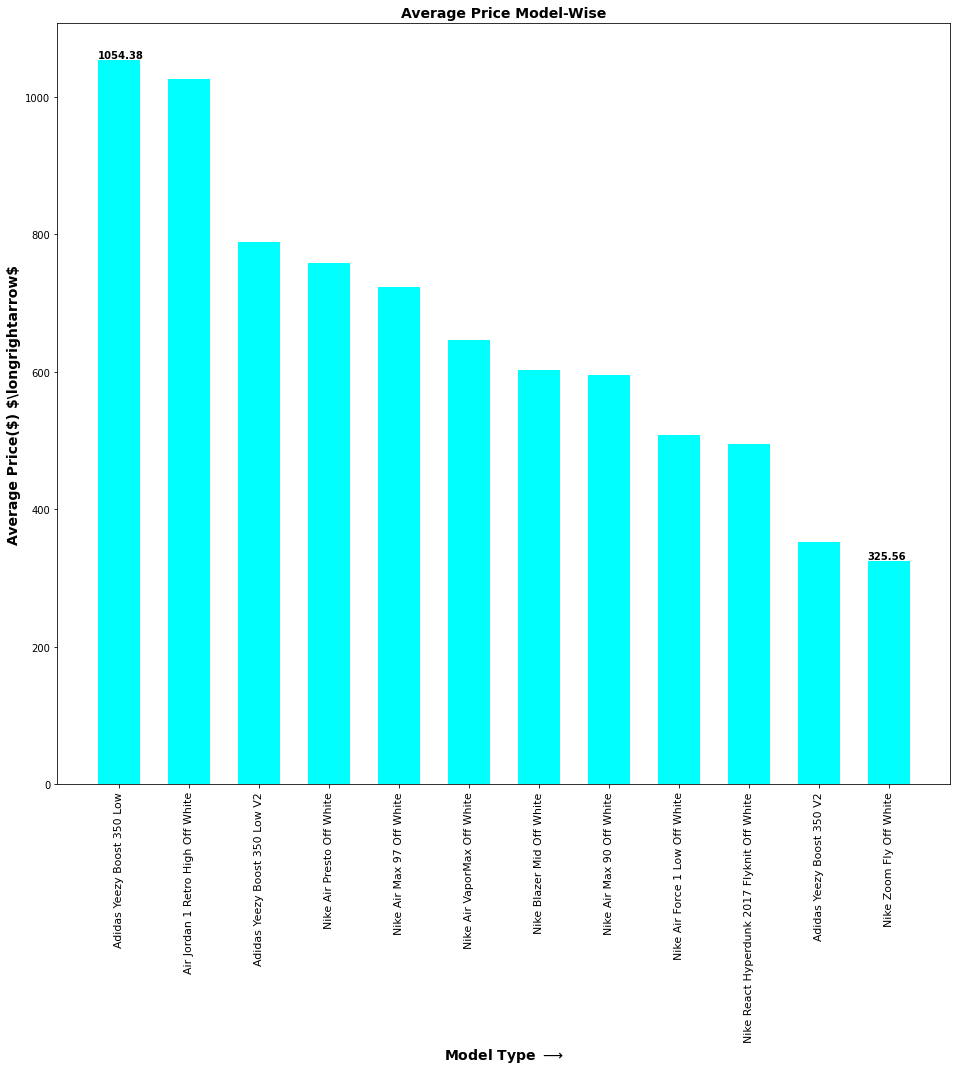

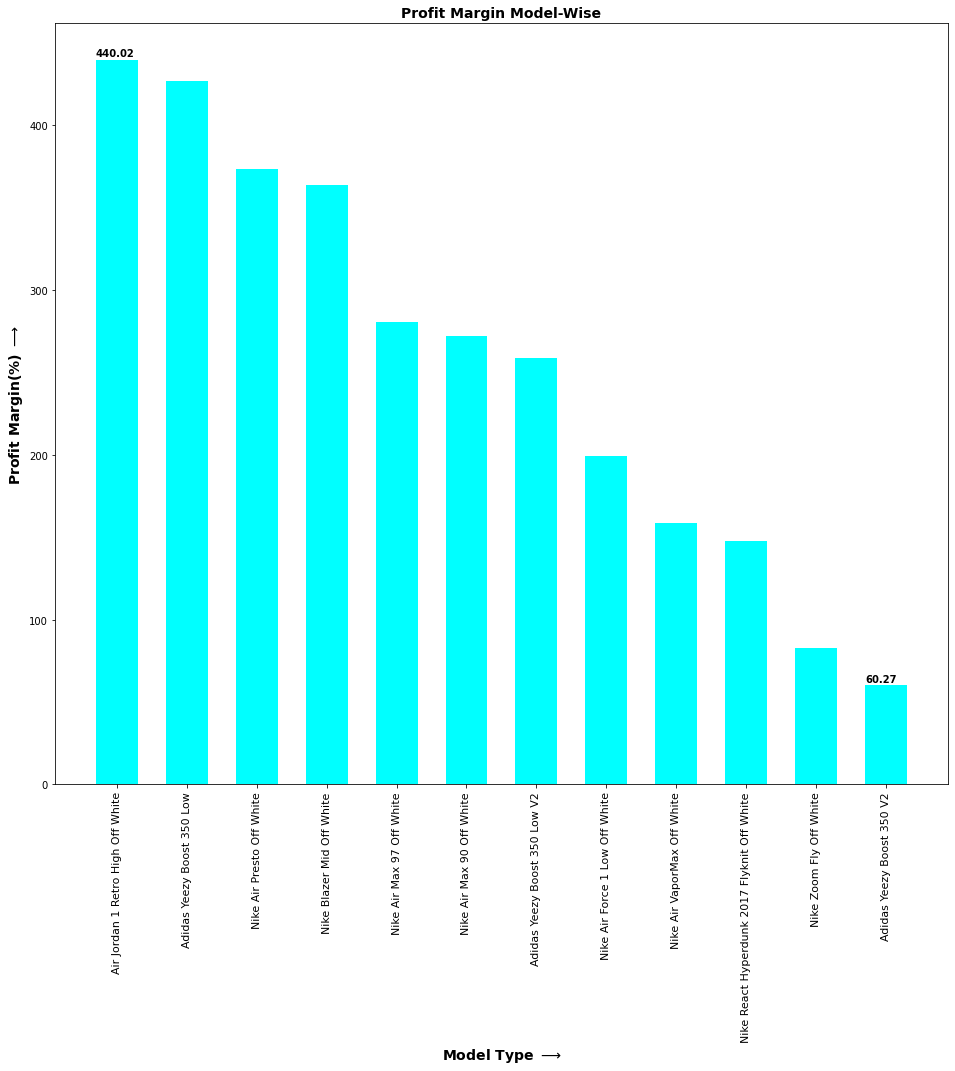

In [14]:
plt.figure(figsize=(16,14))
plt.bar(model_sell.index,model_sell,width=0.6,align='center',color='cyan')
plt.xticks(rotation=90,size=11)
for i in range(0,12,11):
    plt.annotate(model_sell[i],(-0.3+i,model_sell[i]+2),rotation=0,fontweight='bold')
plt.xlabel(r'Model Type $\longrightarrow$',fontweight='bold',fontsize=14)
plt.ylabel(r'Average Price($) $\longrightarrow$',fontweight='bold',fontsize=14)
plt.title('Average Price Model-Wise',fontweight='bold',fontsize=14)
plt.figure(figsize=(16,14))
plt.bar(model_profit.index,model_profit,width=0.6,align='center',color='cyan')
plt.xticks(rotation=90,size=11)
for i in range(0,12,11):
    plt.annotate(model_profit[i],(-0.3+i,model_profit[i]+2),rotation=0,fontweight='bold')
plt.xlabel(r'Model Type $\longrightarrow$',fontweight='bold',fontsize=14)
plt.ylabel(r'Profit Margin(%) $\longrightarrow$',fontweight='bold',fontsize=14)
plt.title('Profit Margin Model-Wise',fontweight='bold',fontsize=14)


# 3) Color Wise

### Grouping Data Color Wise, Using only Model Adidas Yeezy Boost 350 V2 as it has sufficient color variations
### Color-Wise Number of orders

In [15]:
df_color=df_model_wise[df_model_wise['Model Name']=='Adidas Yeezy Boost 350 V2']
df_color_unique=df_color["Sneaker Name"].unique().tolist()
df_color['Color']=''
for i in range(len(df_color.index)):
    color=df_color.iloc[i,2].split(' ')
    color_name_list=color[5:]
    color_name=''
    for l in color_name_list:
        color_name=color_name+" "+l
    df_color.iloc[i,-1]=color_name
df_color_group=df_color.groupby('Color')
color_count=df_color_group['Sneaker Name'].count().sort_values(ascending=False)
print(color_count)

C:\Users\kp200\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\kp200\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Color
 Butter                 11423
 Beluga 2pt0            10395
 Zebra                  10110
 Blue Tint               9297
 Cream White             9097
 Sesame                  5553
 Static                  4983
 Semi Frozen Yellow      4854
 Static Reflective       3184
 Core Black Red 2017      969
 Core Black White         621
 Core Black Red           302
 Core Black Copper        225
 Core Black Green         196
Name: Sneaker Name, dtype: int64


### Color-Wise Profit Margin

In [16]:
color_profit=df_color_group['Profit Margin'].agg(np.mean).sort_values(ascending=False)
color_profit=np.around(color_profit,decimals=2)
print(color_profit)

Color
 Core Black Red         326.25
 Core Black Red 2017    265.59
 Core Black White       226.55
 Core Black Copper      198.47
 Core Black Green       183.09
 Static Reflective      112.79
 Beluga 2pt0             82.02
 Semi Frozen Yellow      77.54
 Blue Tint               72.27
 Zebra                   64.21
 Cream White             31.23
 Static                  30.48
 Butter                  22.62
 Sesame                  20.03
Name: Profit Margin, dtype: float64


### Plotting the number of orders and profit margin w.r.t Color graphs

Text(0.5, 1.0, 'Profit Margin Color-Wise')

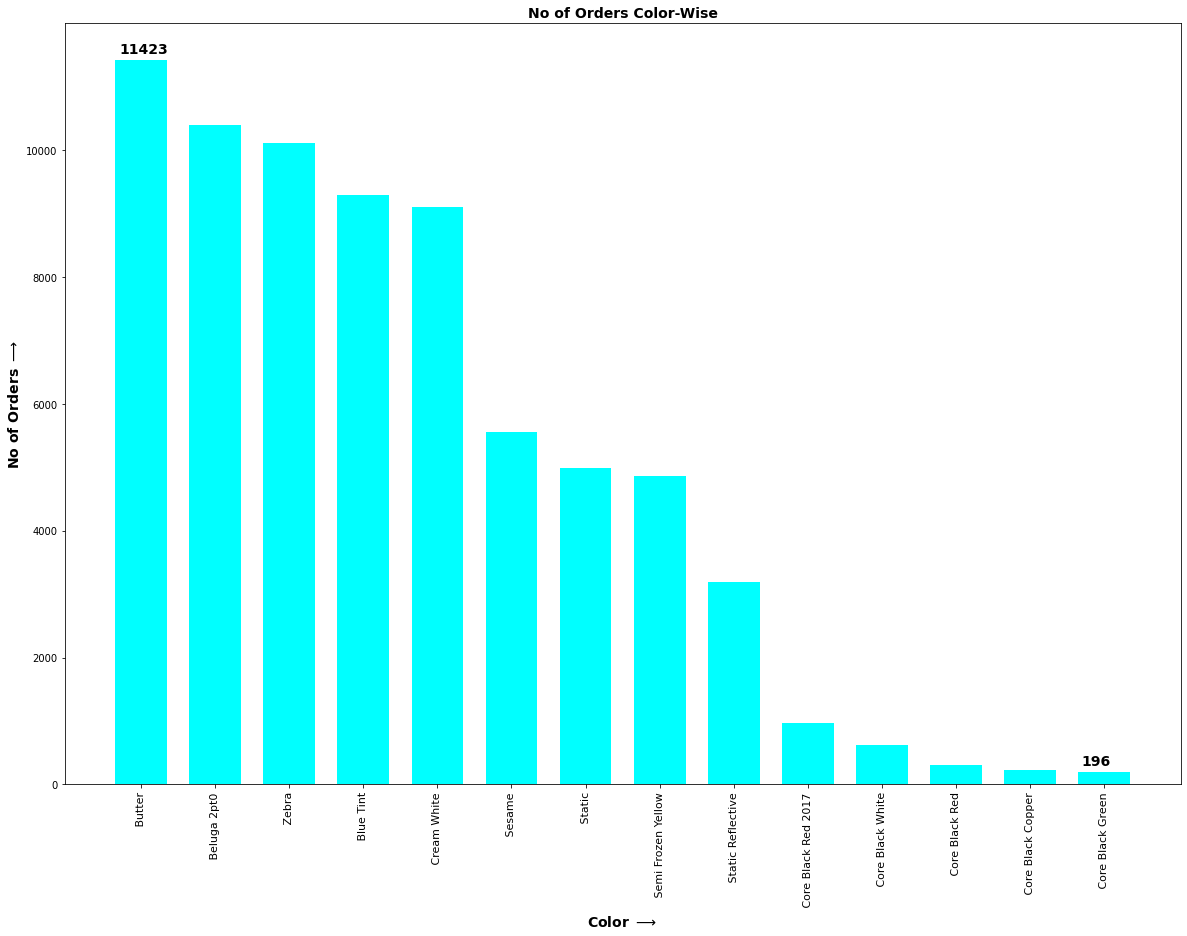

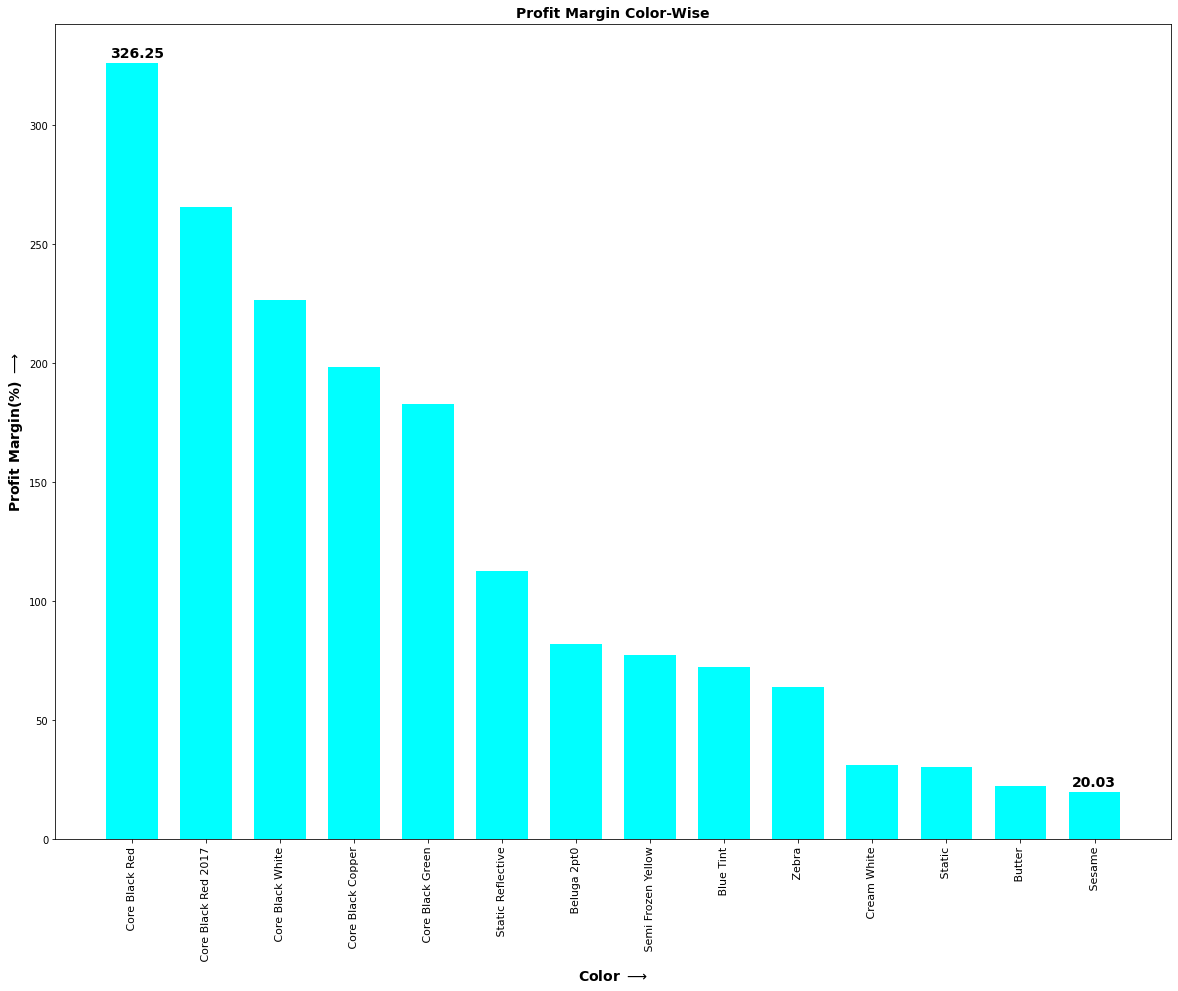

In [17]:
plt.figure(figsize=(20,14))
plt.bar(color_count.index,color_count,width=0.7,align='center',color='cyan')
plt.xticks(rotation=90,size=11)
for i in range(0,14,13):
    plt.annotate(color_count[i],(-0.3+i,color_count[i]+100),rotation=0,fontweight='bold',fontsize=14)
plt.xlabel(r'Color $\longrightarrow$',fontweight='bold',fontsize=14)
plt.ylabel(r'No of Orders $\longrightarrow$',fontweight='bold',fontsize=14)
plt.title('No of Orders Color-Wise',fontweight='bold',fontsize=14)  
plt.figure(figsize=(20,15))
plt.bar(color_profit.index,color_profit,width=0.7,align='center',color='cyan')
plt.xticks(rotation=90,size=11)
for i in range(0,14,13):
    plt.annotate(color_profit[i],(-0.3+i,color_profit[i]+2),rotation=0,fontweight='bold',fontsize=14)
plt.xlabel(r'Color $\longrightarrow$',fontweight='bold',fontsize=14)
plt.ylabel(r'Profit Margin(%) $\longrightarrow$',fontweight='bold',fontsize=14)
plt.title('Profit Margin Color-Wise',fontweight='bold',fontsize=14)

# 4)Season at the time of selling wise

### Number of orders Season Wise

In [18]:
df_time=df_model_wise.copy()
seasons_dict={'1':'Winter',
              '2':'Winter',
              '3':'Spring',
              '4':'Spring',
              '5':'Spring',
              '6':'Summer',
              '7':'Summer',
              '8':'Summer',
              '9':'Fall',
              '10':'Fall',
              '11':'Fall',
              '12':'Winter'
              }

df_time['Season']=''

for i in range(len(df_time.index)):
    month_number=df_time.iloc[i,0].split('/')[0]
    df_time.iloc[i,-1]=seasons_dict[month_number]
    
df_time_group=df_time.groupby('Season')
season_count=df_time_group['Sneaker Name'].count().sort_values(ascending=False)
print(season_count)


Season
Winter    44577
Fall      27467
Summer    18955
Spring     8957
Name: Sneaker Name, dtype: int64


### Profit Margin Season Wise

In [19]:
season_profit=df_time_group['Profit Margin'].agg(np.mean).sort_values(ascending=False)
season_profit=np.around(season_profit,decimals=2)
print(season_profit)

Season
Spring    197.86
Summer    143.45
Fall      135.27
Winter     95.79
Name: Profit Margin, dtype: float64


### Plotting the Number of Orders and Profit Margin w.r.t Season Wise Graph

Text(0.5, 1.0, 'Profit Margin Season-Wise')

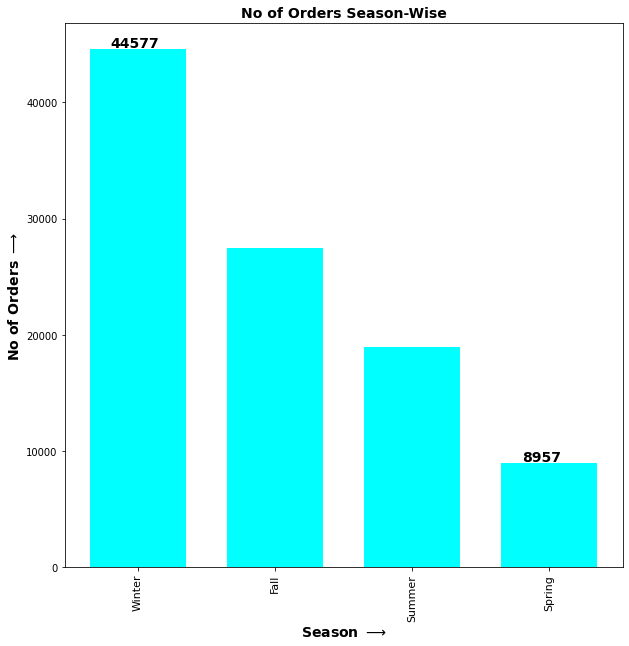

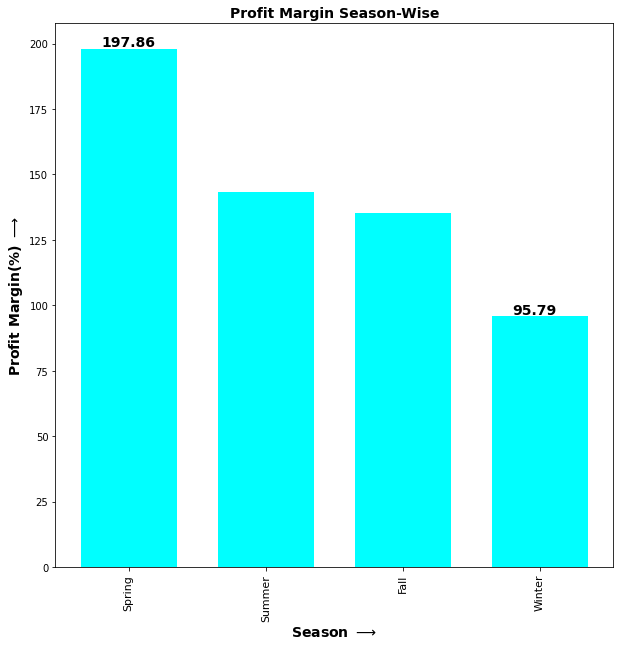

In [20]:
plt.figure(figsize=(10,10))
plt.bar(season_count.index,season_count,width=0.7,align='center',color='cyan')
plt.xticks(rotation=90,size=11)
for i in range(0,4,3):
    plt.annotate(season_count[i],(-0.2+i,season_count[i]+150),rotation=0,fontweight='bold',fontsize=14)
plt.xlabel(r'Season $\longrightarrow$',fontweight='bold',fontsize=14)
plt.ylabel(r'No of Orders $\longrightarrow$',fontweight='bold',fontsize=14)
plt.title('No of Orders Season-Wise',fontweight='bold',fontsize=14)  
plt.figure(figsize=(10,10))
plt.bar(season_profit.index,season_profit,width=0.7,align='center',color='cyan')
plt.xticks(rotation=90,size=11)
for i in range(0,4,3):
    plt.annotate(season_profit[i],(-0.2+i,season_profit[i]+1),rotation=0,fontweight='bold',fontsize=14)
plt.xlabel(r'Season $\longrightarrow$',fontweight='bold',fontsize=14)
plt.ylabel(r'Profit Margin(%) $\longrightarrow$',fontweight='bold',fontsize=14)
plt.title('Profit Margin Season-Wise',fontweight='bold',fontsize=14)

# 5)Number Of Months Between Buying and selling

### No of orders 

In [21]:
df_gap=df_time.copy()
df_gap['Gap']=''


for i in range(len(df_gap.index)):
    gap=(int(df_gap.iloc[i,0].split('/')[2])-int(df_gap.iloc[i,5].split('/')[2]))*12 +(int(df_gap.iloc[i,0].split('/')[0])-int(df_gap.iloc[i,5].split('/')[0]))
    if(gap<0):
        df_gap.iloc[i,-1]='Pre-order'
        continue
    elif(0 <= gap <=6):
        df_gap.iloc[i,-1]='0-0.5 Year'
        continue
    elif(6 <= gap <= 12):
        df_gap.iloc[i,-1]='0.5-1 Year'
        continue
    elif(12 <= gap <= 18):
        df_gap.iloc[i,-1]='1-1.5 Year'
        continue
    elif(18 <= gap <= 24):
        df_gap.iloc[i,-1]='1.5-2 Year'
        continue
    elif(24 <= gap <= 30):
        df_gap.iloc[i,-1]='2-2.5 Year'
        continue
    elif(30 <= gap <=36):
        df_gap.iloc[i,-1]='2.5-3 Year'
        continue
    elif(36 <= gap <= 42):
        df_gap.iloc[i,-1]='3-3.5 Year'
        continue
    elif(42 <= gap <= 48):
        df_gap.iloc[i,-1]='3.5-4 Year'
        continue
df_gap_group=df_gap.groupby('Gap')
gap_count=df_gap_group['Sneaker Name'].count().sort_values(ascending=False)
print(gap_count)

Gap
0-0.5 Year    66119
1.5-2 Year    12682
1-1.5 Year    10448
0.5-1 Year     8620
Pre-order      1410
2-2.5 Year      420
2.5-3 Year      152
3-3.5 Year      102
3.5-4 Year        3
Name: Sneaker Name, dtype: int64


### Profit Margin

In [22]:
gap_profit=df_gap_group['Profit Margin'].agg(np.mean).sort_values(ascending=False)
gap_profit=np.around(gap_profit,decimals=2)
print(gap_profit)

Gap
3.5-4 Year    533.33
3-3.5 Year    430.22
Pre-order     416.04
2.5-3 Year    398.99
2-2.5 Year    292.57
0.5-1 Year    170.74
0-0.5 Year    130.90
1-1.5 Year     88.21
1.5-2 Year     48.34
Name: Profit Margin, dtype: float64


### Plotting Number of Orders and Profit Margin w.r.t gap is Release Date and Order Date graphs

Text(0.5, 1.0, 'Profit Margin Gap-Wise')

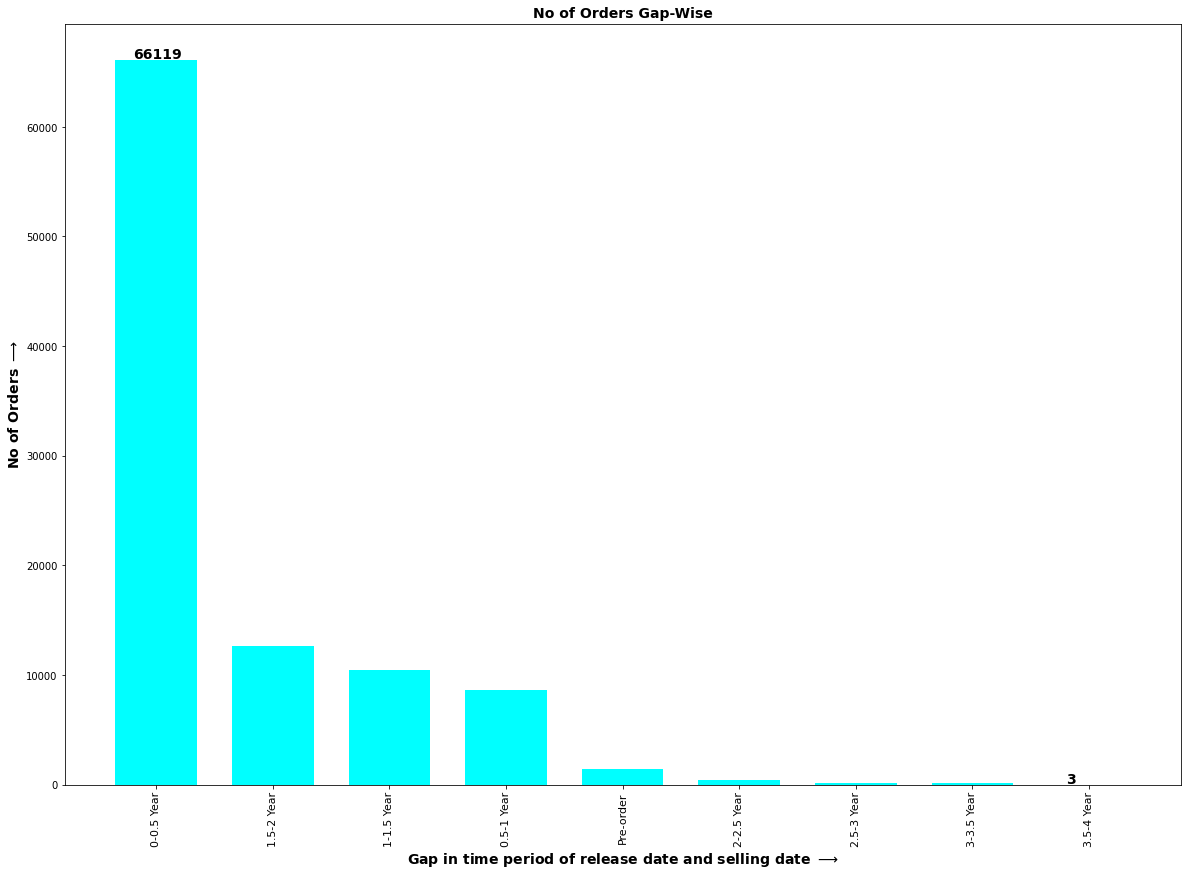

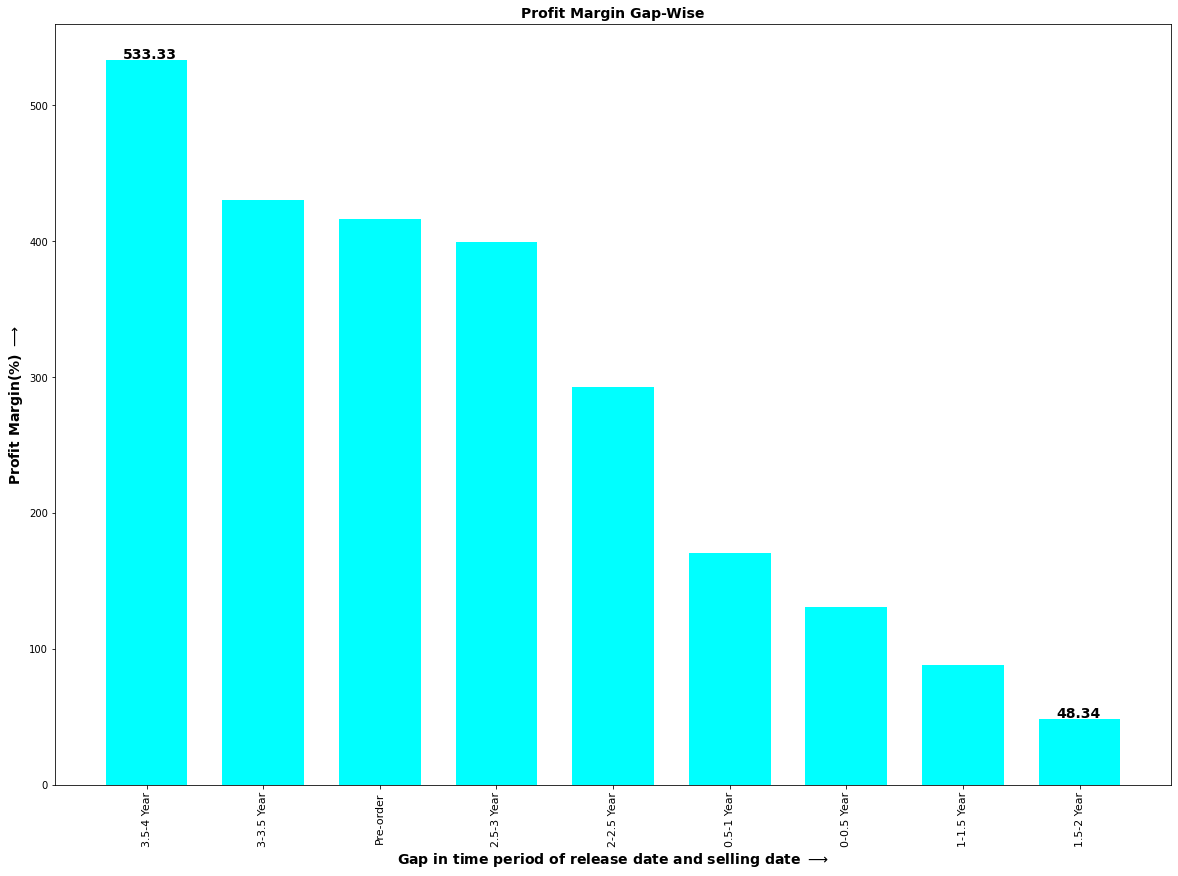

In [23]:
plt.figure(figsize=(20,14))
plt.bar(gap_count.index,gap_count,width=0.7,align='center',color='cyan')
plt.xticks(rotation=90,size=11)
for i in range(0,9,8):
    plt.annotate(gap_count[i],(-0.2+i,gap_count[i]+150),rotation=0,fontweight='bold',fontsize=14)
plt.xlabel(r'Gap in time period of release date and selling date $\longrightarrow$',fontweight='bold',fontsize=14)
plt.ylabel(r'No of Orders $\longrightarrow$',fontweight='bold',fontsize=14)
plt.title('No of Orders Gap-Wise',fontweight='bold',fontsize=14)  
plt.figure(figsize=(20,14))
plt.bar(gap_profit.index,gap_profit,width=0.7,align='center',color='cyan')
plt.xticks(rotation=90,size=11)
for i in range(0,9,8):
    plt.annotate(gap_profit[i],(-0.2+i,gap_profit[i]+1),rotation=0,fontweight='bold',fontsize=14)
plt.xlabel(r'Gap in time period of release date and selling date $\longrightarrow$',fontweight='bold',fontsize=14)
plt.ylabel(r'Profit Margin(%) $\longrightarrow$',fontweight='bold',fontsize=14)
plt.title('Profit Margin Gap-Wise',fontweight='bold',fontsize=14)

# Shoe Size Wise

### No of orders size-wise

In [24]:
df_size=df_gap.copy()
df_size['Shoe Size']=df_size['Shoe Size'].astype(str)
df_size_group=df_size.groupby('Shoe Size')
size_count=df_size_group['Sneaker Name'].count().sort_values(ascending=False)
print(size_count)

Shoe Size
10.0    11093
9.0      9706
11.0     9251
10.5     8784
9.5      8685
12.0     7297
8.0      5363
8.5      5300
13.0     4602
11.5     4502
6.0      4013
7.0      3867
5.0      3577
7.5      2664
5.5      2621
4.0      2241
6.5      2219
14.0     1791
4.5      1304
12.5      628
13.5      147
15.0      130
14.5       84
16.0       79
3.5         4
17.0        4
Name: Sneaker Name, dtype: int64


### Profit Margin Size-Wise

In [25]:
size_profit=df_size_group['Profit Margin'].agg(np.mean).sort_values(ascending=False)
size_profit=np.around(size_profit,decimals=2)
print(size_profit)

Shoe Size
17.0    480.83
15.0    278.89
16.0    247.62
10.0    145.61
11.0    143.82
8.0     140.67
13.0    139.24
12.0    132.02
9.0     131.76
14.0    125.40
9.5     123.61
10.5    121.74
8.5     120.28
7.0     115.29
11.5    113.91
7.5     112.41
6.5     107.60
3.5     106.26
14.5    105.12
6.0     104.64
12.5     99.70
4.5      94.43
4.0      88.31
5.0      86.70
13.5     78.68
5.5      76.20
Name: Profit Margin, dtype: float64


Text(0.5, 1.0, 'Profit Margin Size-Wise')

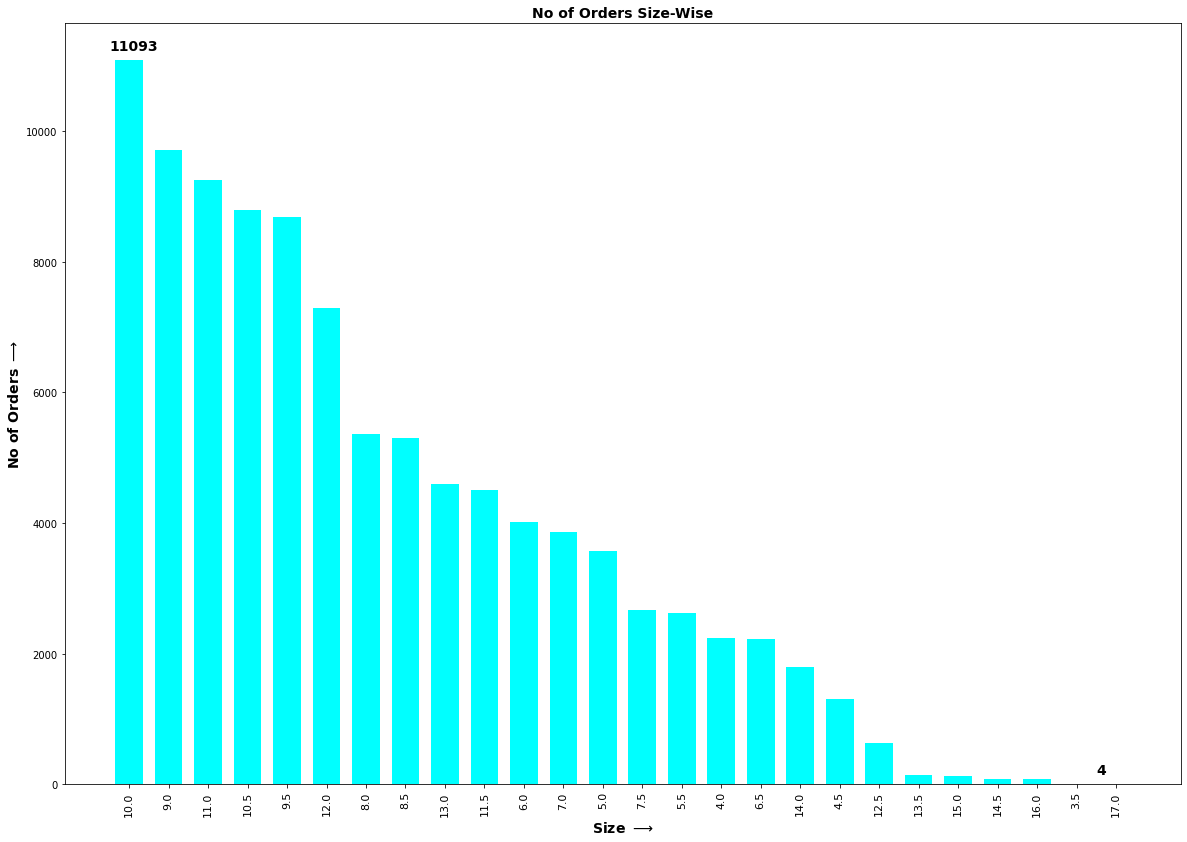

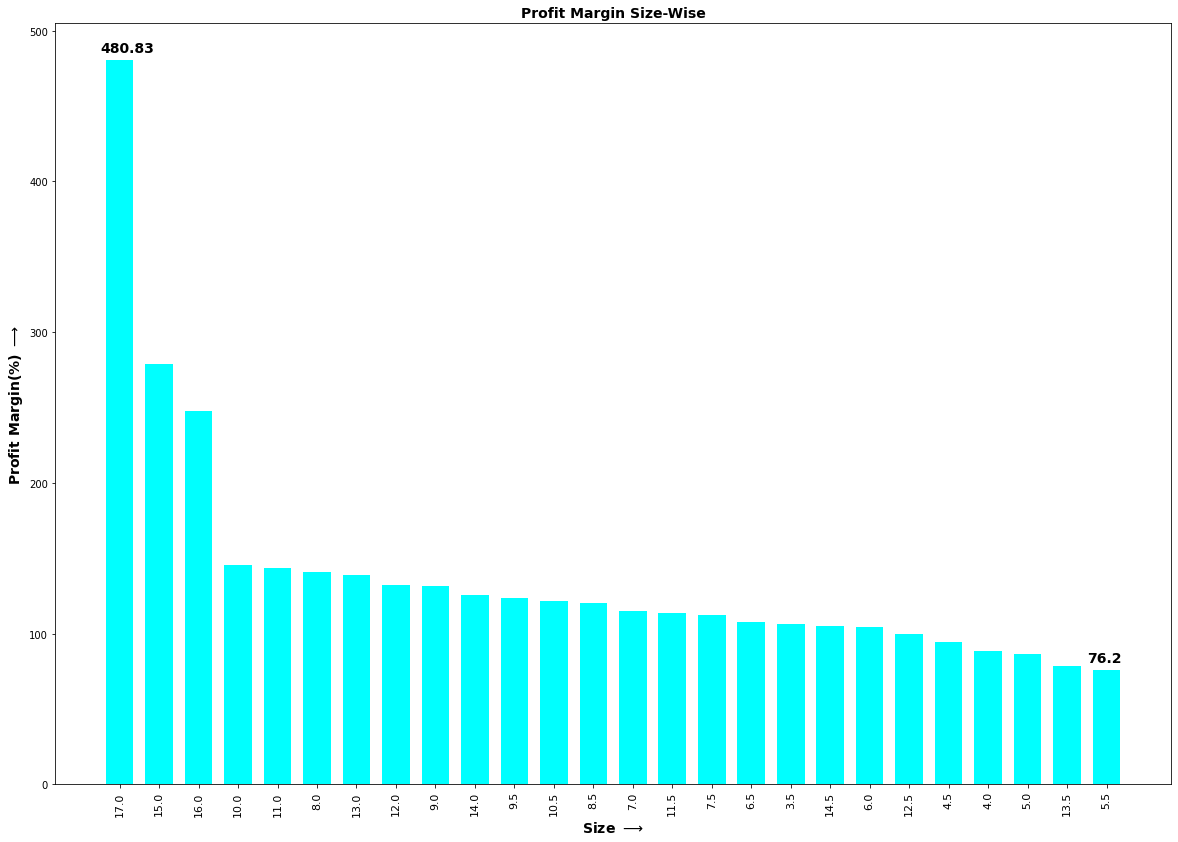

In [26]:
plt.figure(figsize=(20,14))
plt.bar(size_count.index,size_count,width=0.7,align='center',color='cyan')
plt.xticks(rotation=90,size=11)
for i in range(0,26,25):
    plt.annotate(size_count[i],(-0.5+i,size_count[i]+150),rotation=0,fontweight='bold',fontsize=14)
plt.xlabel(r'Size $\longrightarrow$',fontweight='bold',fontsize=14)
plt.ylabel(r'No of Orders $\longrightarrow$',fontweight='bold',fontsize=14)
plt.title('No of Orders Size-Wise',fontweight='bold',fontsize=14)  
plt.figure(figsize=(20,14))
plt.bar(size_profit.index,size_profit,width=0.7,align='center',color='cyan')
plt.xticks(rotation=90,size=11)
for i in range(0,26,25):
    plt.annotate(size_profit[i],(-0.5+i,size_profit[i]+5),rotation=0,fontweight='bold',fontsize=14)
plt.xlabel(r'Size $\longrightarrow$',fontweight='bold',fontsize=14)
plt.ylabel(r'Profit Margin(%) $\longrightarrow$',fontweight='bold',fontsize=14)
plt.title('Profit Margin Size-Wise',fontweight='bold',fontsize=14)